## Identify overlapping genes between extTADA (FDR < 0.3) and other gene sets

There are 309 genes identified by the TADA methods (FDR < 0.3)

For each gene set which includes N genes, there are main steps to calculate significant value:

1. Count the number of genes overlapping between the 309 genes and the gene set, nG.

2. For i from 1 to K (times)

    - Randomly choose a set of N genes from all genes (>20000 genes).
    
    - Count the number of genes overlapping between the 309 genes and the random gene set, $M_i$.
    
3. Calculate p value for the gene set, using the formula:

*pValue = 1 - pnorm(nG, mean(vM), sd(vM))*

with $vM = c(M_1, M_2, ..M_K)$
    

In [1]:
xAll <- readLines("../data/list.allGenes.txt")
xFMRP <- readLines("../data/list.FMRP.txt")
xResult <- readLines("../data/List.309genes.FDR03.from.scz2016.txt.sort")


## List Genes from 108 loci

In [89]:
x1 <- readLines("../data/list.proteinCodingGenes.from108.txt.sort")

p value: 0.0120992532241333


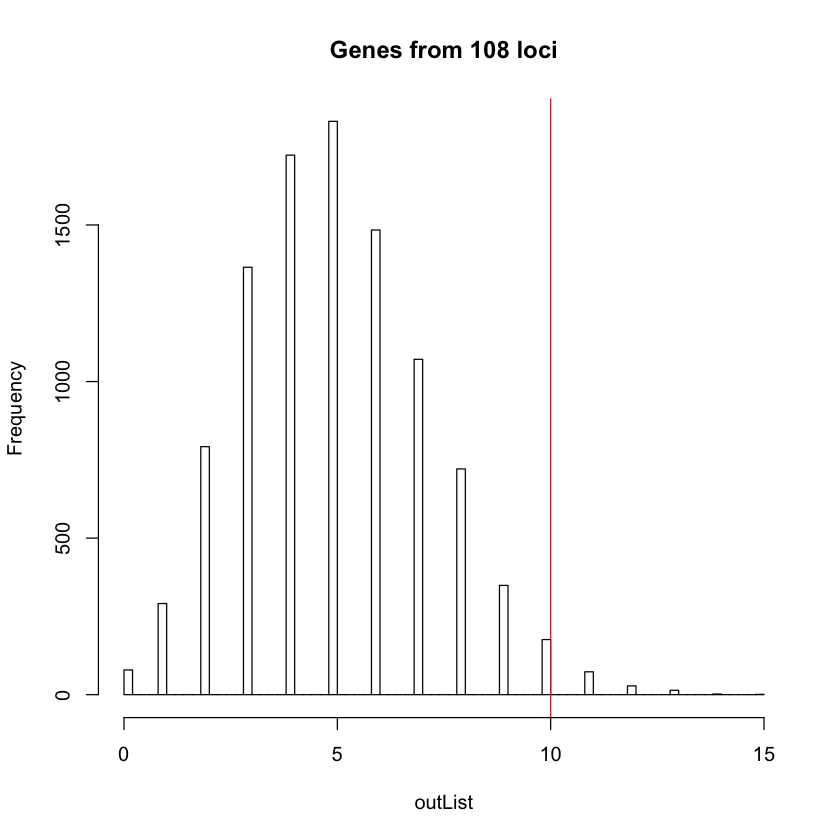

In [92]:
pList <- NULL
nG <- NULL
lGeneSet <- NULL

xFMRP <- x1
xFMRP <- unique(xFMRP)

l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 10000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
message("p value: ", 1- pnorm(xIntersect, mean(outList), sd = sd(outList)))

    hist(outList, 100, main = "Genes from 108 loci", xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    



## Purcell Swedex sets

In [2]:
dirF = "~/Documents/SaveDataFromServer/set_genelist/genelists/purcell_swedex_sets"

fileN = dir(dirF)


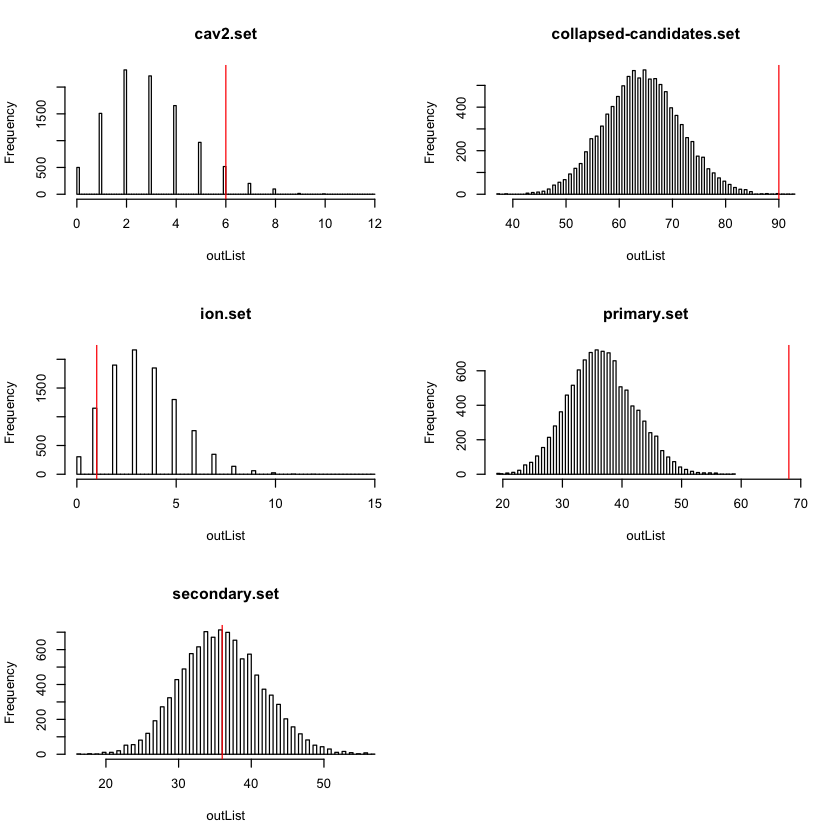

In [18]:
pList <- NULL
nG <- NULL
lGeneSet <- NULL

par(mfrow = c(3, 2))
for (kk in c(1, 2, 5:7)){
x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
xFMRP <- as.character(x1[, 1])
xFMRP <- unique(xFMRP)

l1 <- length(xFMRP)
lGeneSet[kk] <- l1
    
nSample <- 10000 ##Number of sampling from all genes
outList <- NULL

xIntersect <- length(intersect(xFMRP, xResult))
nG[kk] <- xIntersect
for (i in 1:nSample){
  tempGene <- sample(xAll, l1)
  outList[i] <- length(intersect(tempGene, xResult))
  
}

#plot(density(outList))
#abline(v = xIntersect)
pList[kk] <- 1- pnorm(xIntersect, mean(outList), sd = sd(outList))

    hist(outList, 100, main = fileN[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
}


In [19]:
outD <- cbind(fileN, pList, nG, lGeneSet)
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength")
outD

gene_set_name,pValue,nOverlappingGene,GeneSetLength
cav2.set,0.0397465092600058,6,206
collapsed-candidates.set,0.000190913043037422,90,4465
gene-families.set,NA,NA,NA
go.set,NA,NA,NA
ion.set,0.905382553661417,1,237
primary.set,1.06790679632596e-08,68,2546
secondary.set,0.512454915501641,36,2507


### Based on the table above, the overlapping proportion between *primary.set* and *309 genes* is higher than expected by chance.


### Take a loser look for the primary.set

In [52]:
allFile <- read.table("/Users/hoang/Documents/SaveDataFromServer/set_genelist/genelists/purcell_swedex_sets/primary.set")

In [53]:
go1 <- split(allFile, allFile[, 2])

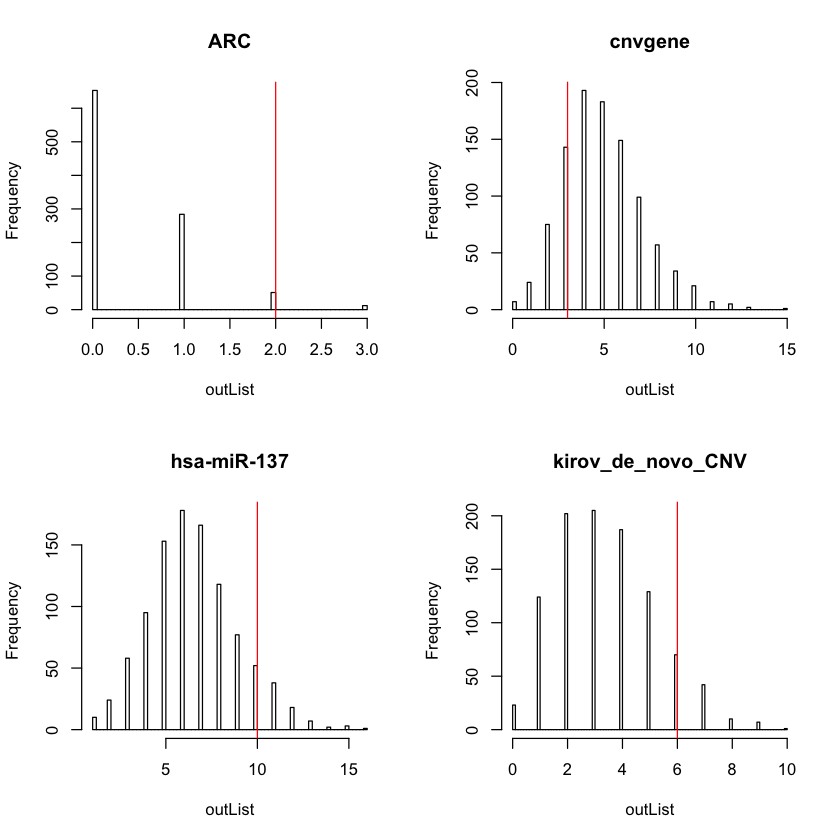

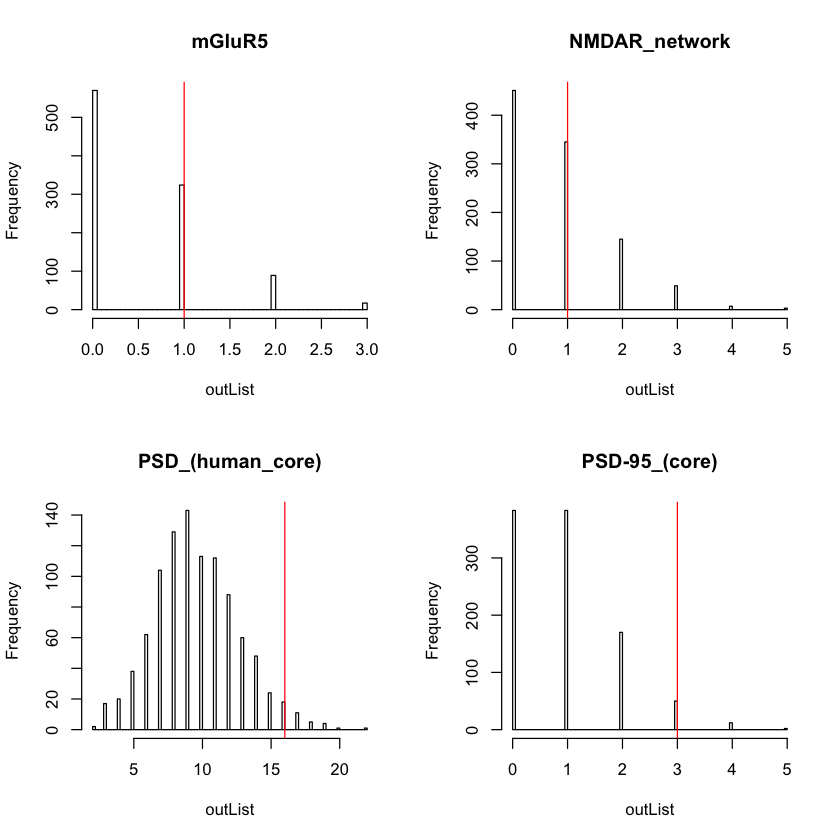

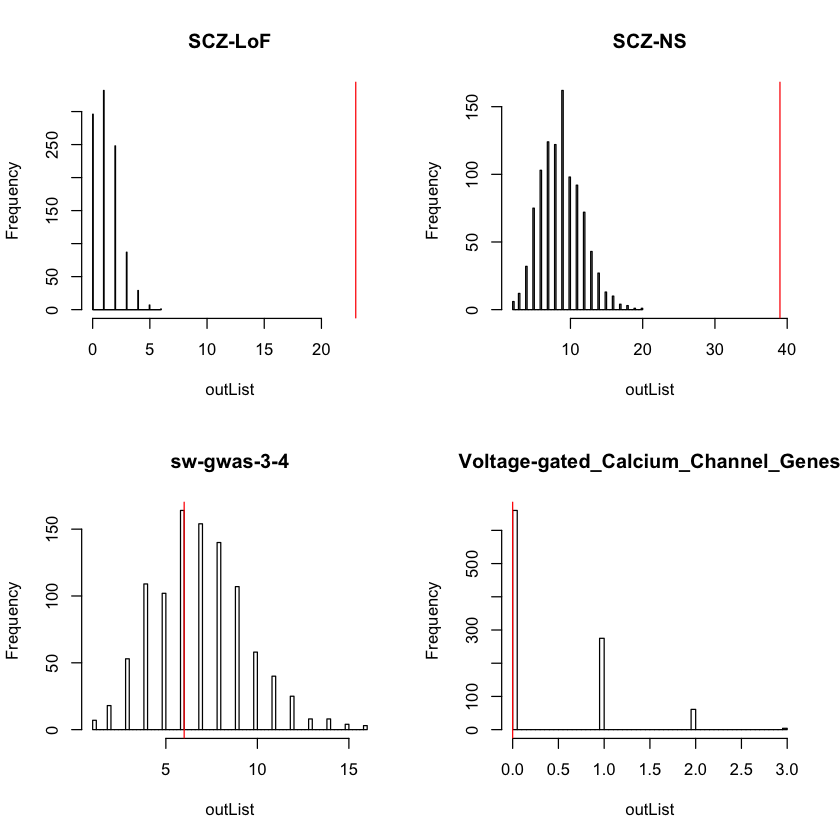

In [54]:
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- 1- pnorm(xIntersect, mean(outList), sd = sd(outList))
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
  
  
}


In [55]:
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4))
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage")
outD[order(outD[, 2]) ,]

gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
SCZ-LoF,0,23,87,7.44
SCZ-NS,0,39,611,12.62
ARC,0.00734872407261133,2,28,0.65
PSD-95_(core),0.0141101351551666,3,65,0.97
PSD_(human_core),0.020094325353089,16,685,5.18
kirov_de_novo_CNV,0.0764745838388695,6,234,1.94
hsa-miR-137,0.080076953578589,10,446,3.24
mGluR5,0.269169254021558,1,39,0.32
NMDAR_network,0.425724306605962,1,61,0.32
sw-gwas-3-4,0.64193490769888,6,479,1.94


## The brainspan.set

In [12]:
allFile <- read.table("/Users/hoang/Documents/SaveDataFromServer/set_genelist/brainspan.set")

In [13]:
head(allFile)

,V1,V2
1,A1CF,LOW
2,A2M,HIGH
3,A2M,POST
4,A2ML1,LOW
5,A3GALT2,LOW
6,A4GALT,POST


In [35]:
go1 <- split(allFile, allFile[, 2])

In [36]:
table(allFile[, 2])


  CACN-HIGH    CACN-LOW   CACN-POST    CACN-PRE DENOVO-HIGH  DENOVO-LOW 
         15           7           6           6         387         170 
DENOVO-POST  DENOVO-PRE   FMRP-HIGH    FMRP-LOW   FMRP-POST    FMRP-PRE 
         81         338         706           3         193         359 
       HIGH         LOW    one-HIGH     one-LOW    one-POST     one-PRE 
       9378        6259        1417         165         391         835 
       POST         PRE    PSD-HIGH     PSD-LOW    PSD-POST     PSD-PRE 
       2432        8052         685           6         205         293 

In [38]:
length(go1)
head(go1[[1]])
length(go1)

[1] 24

,V1,V2
31802,CACNA1A,CACN-HIGH
31803,CACNA1B,CACN-HIGH
31804,CACNA1E,CACN-HIGH
31805,CACNA1G,CACN-HIGH
31806,CACNA1H,CACN-HIGH
31807,CACNA2D1,CACN-HIGH


[1] 24

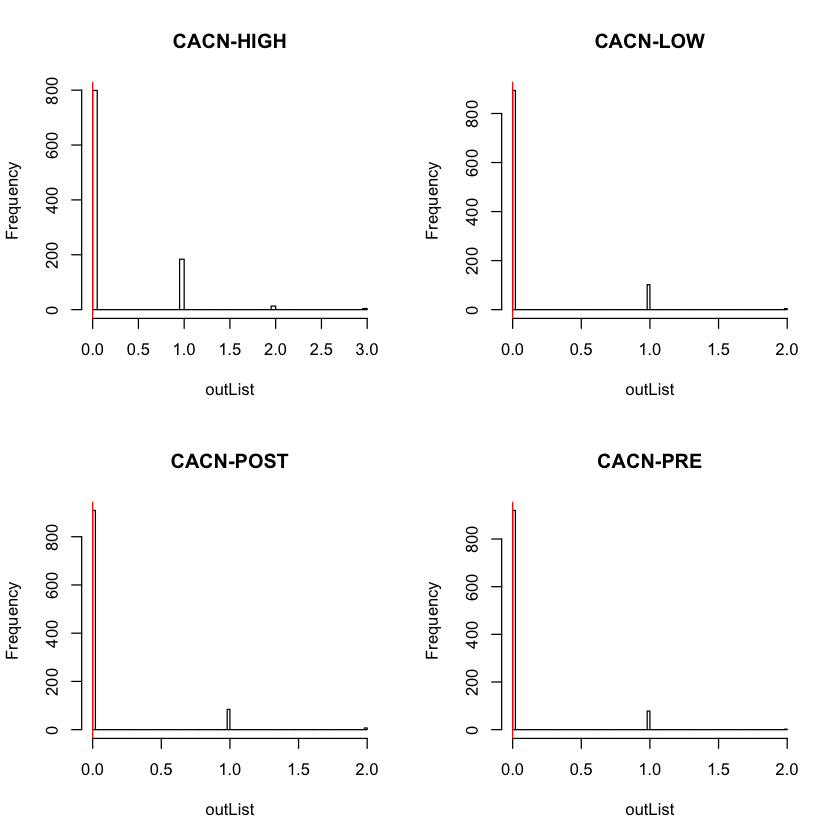

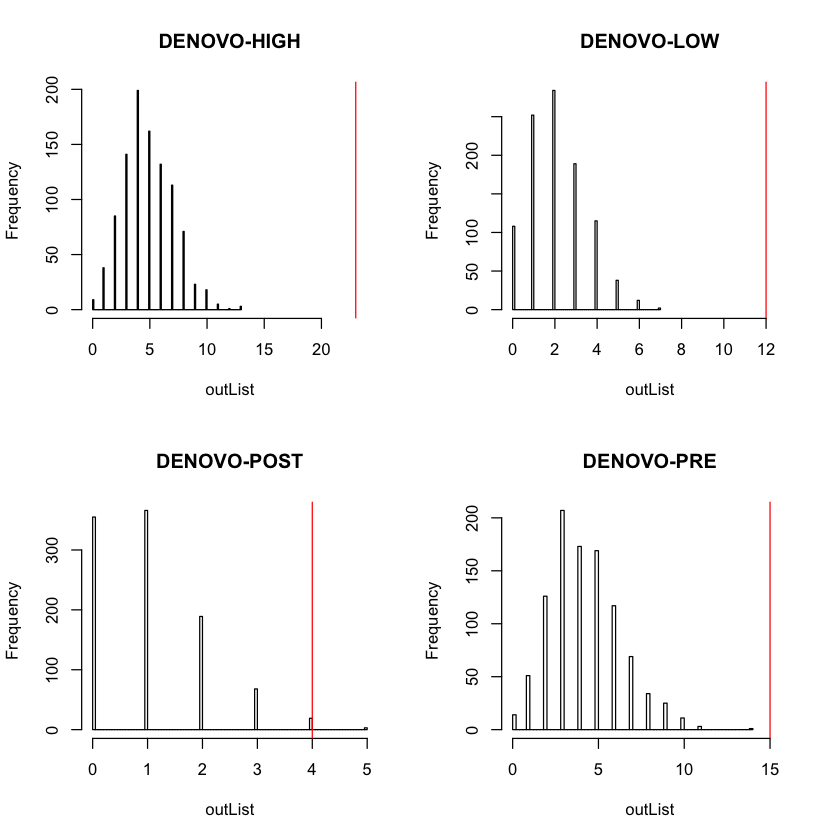

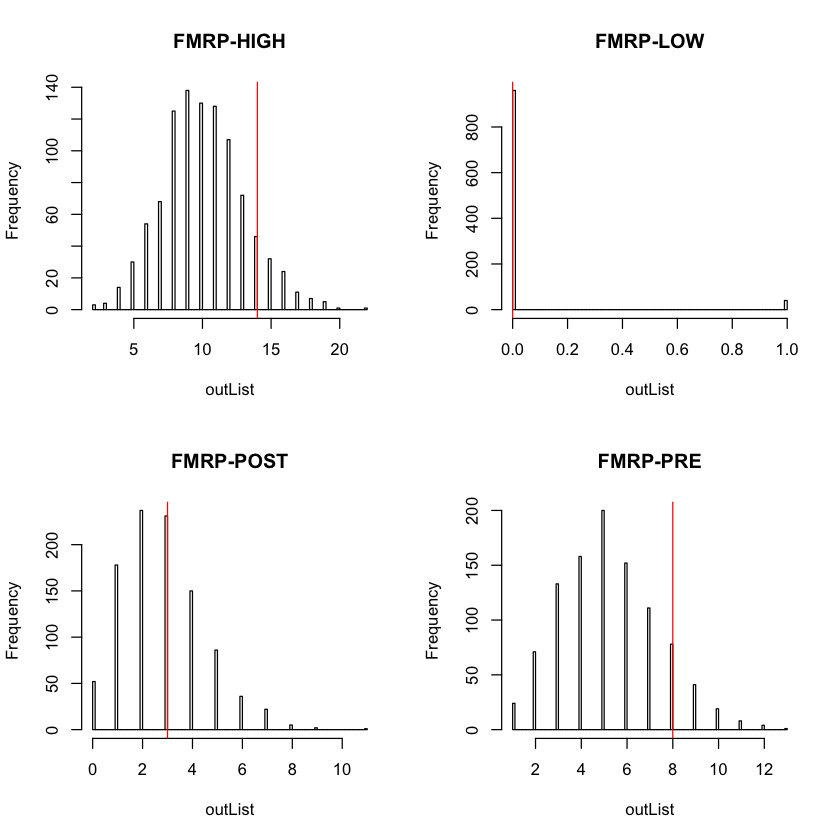

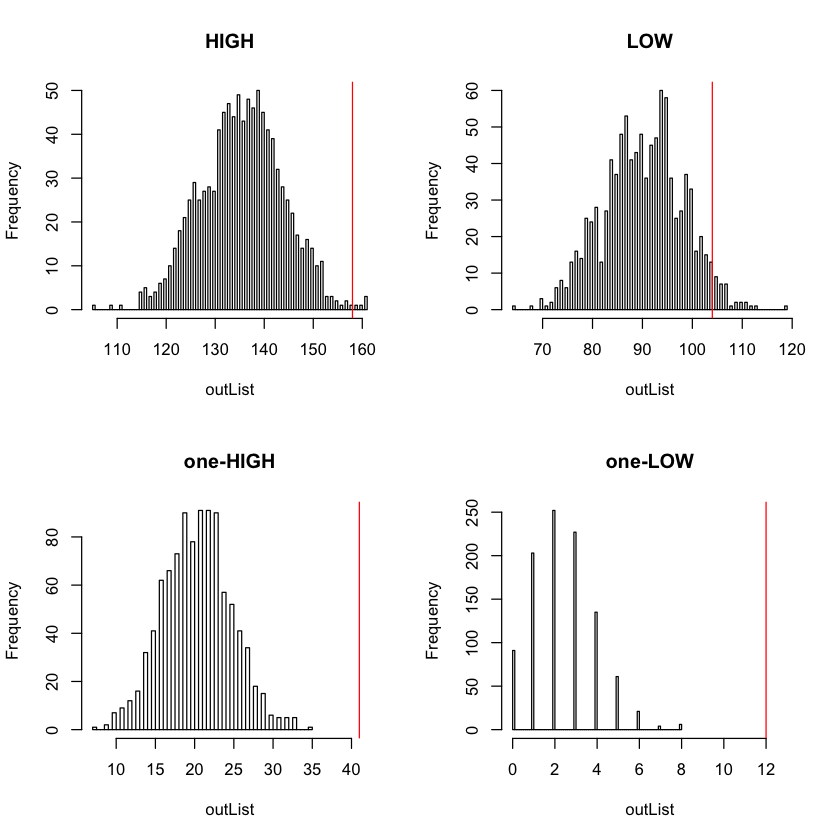

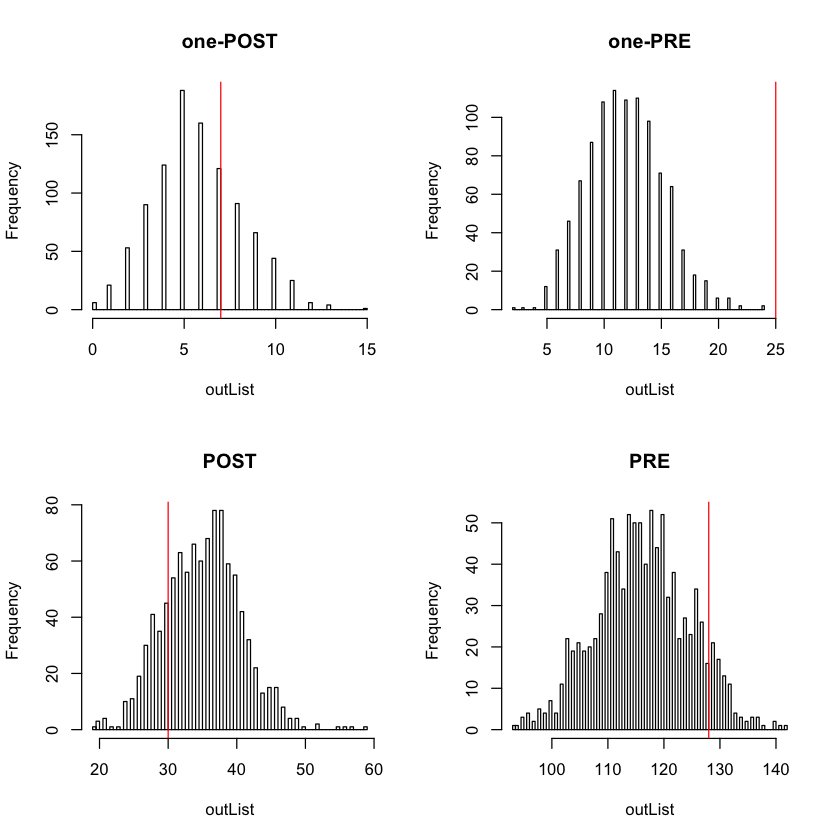

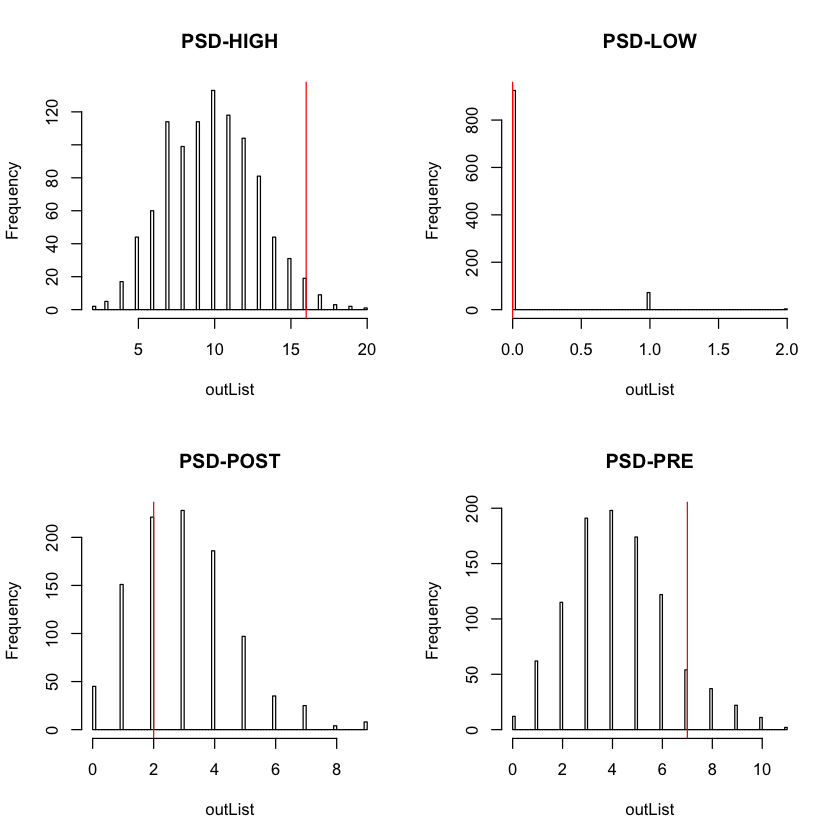

In [43]:
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- 1- pnorm(xIntersect, mean(outList), sd = sd(outList))
    
       hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
    abline(v = xIntersect, col = 'red')
    
  
  
}


In [51]:
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4))
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage")
outD[order(outD[, 2]) ,]

gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
DENOVO-POST,0.00180028376883712,4,72,1.29
HIGH,0.00411401517608889,158,9378,51.13
PSD-HIGH,0.0197756259466362,16,685,5.18
LOW,0.0439962705994952,104,6259,33.66
PRE,0.082812694214905,128,8052,41.42
PSD-PRE,0.0887598763577656,7,293,2.27
FMRP-PRE,0.0984349332174244,8,359,2.59
FMRP-HIGH,0.0995779777098506,14,706,4.53
one-POST,0.313787083890209,7,391,2.27
FMRP-POST,0.455873320700808,3,193,0.97


In [40]:
go1[[kk]][1, 2]

[1] PSD-PRE
24 Levels: CACN-HIGH CACN-LOW CACN-POST CACN-PRE DENOVO-HIGH ... PSD-PRE

## TEST GO.SET

In [57]:
allFile <- read.table("~/Documents/SaveDataFromServer/set_genelist/genelists/purcell_swedex_sets/go.set.2columns", sep = " ")

In [81]:
go0 <- split(allFile, allFile[, 2])

In [82]:
c1 <- lapply(go1, function(x) dim(x)[1] )

#lapply(a, Filter, f = function(x) length(x) >= 3)

In [83]:
NN = 10
go1 <- go0[c1 >= NN]
length(go1)

[1] 1451

In [84]:
pList <- NULL
nameGeneSet <- NULL
nOverlappingGene <- NULL
lGeneSet <- NULL

par(mfrow = c(2, 2))
for (kk in 1:length(go1)){
#  x1 <- read.table(paste(dirF, "/", fileN[kk], sep = ""))
  x1 <- as.character(go1[[kk]][, 1])
#  xFMRP <- as.character(x1[, 1])
    xFMRP <- x1
  xFMRP <- unique(xFMRP)
  
  l1 <- length(xFMRP)
    lGeneSet[kk] <- l1
  nameGeneSet[kk] <- as.character(go1[[kk]][1, 2])
    
  nSample <- 1000 ##Number of sampling from all genes
  outList <- NULL
  
  xIntersect <- length(intersect(xFMRP, xResult))
  
    nOverlappingGene[kk] <- xIntersect
    
  for (i in 1:nSample){
    tempGene <- sample(xAll, l1)
    outList[i] <- length(intersect(tempGene, xResult))
    
  }
  pList[kk] <- 1- pnorm(xIntersect, mean(outList), sd = sd(outList))
    
  #     hist(outList, 100, main = nameGeneSet[kk], xlim = range(c(outList, xIntersect + 1)))
   # abline(v = xIntersect, col = 'red')
    
  
  
}


In [85]:
outD <- cbind(nameGeneSet, pList, nOverlappingGene, lGeneSet, 100*round(nOverlappingGene/309, 4))
colnames(outD) <- c("gene_set_name", "pValue", "nOverlappingGene", "GeneSetLength", "Overlapping Percentage")

head(outD[order(outD[, 2]) ,])


gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
cellular_component,0.000111144096143545,280,17684,90.61
calcium-activated,0.000125415895545156,2,17,0.65
peptidyl-arginine,0.00014162167456333,2,14,0.65
modification,0.000313503221826772,4,57,1.29
pyruvate,0.000366743181635543,3,41,0.97
fibrinolysis,0.000397817120804778,2,18,0.65


In [93]:
dim(outD[outD[, 2] < 0.05, ])

[1] 152   5

In [94]:
outD[outD[, 2] < 0.05, ]

gene_set_name,pValue,nOverlappingGene,GeneSetLength,Overlapping Percentage
3-5-exoribonuclease,0.041409338528424,1,15,0.32
acetyltransferase,0.0010464891151587,5,97,1.62
acid-amino,0.0417635169045575,8,308,2.59
acute,0.0108477413718744,3,63,0.97
aerobic,0.00293836271248005,3,49,0.97
alanine,0.00565267543136405,1,8,0.32
anaphase,0.0317685443004835,1,14,0.32
androgen,0.00277827367064953,3,47,0.97
antibiotic,0.00128339749297102,1,7,0.32
AP-2,0.00970047022187082,1,11,0.32


In [95]:
min(outD[, 2])

[1] "0.000111144096143545"

[1] 1451